In [1]:
# Name - Madhusmita Mukherjee
# Reg. No. - 20BCE2783
# Campus - Vellore

In [2]:
# Build an ANN model for Drug classification.
# This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information,
# including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to
# develop a model that can accurately predict the class or category of a given drug based on its features.
# Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification
# Task 1: Read the dataset and do data pre-processing
# Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)
# Task 3: Test the model with random data

# Task 1: Read the dataset and do data pre-processing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [6]:
df.shape

(200, 6)

In [7]:
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [11]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: ylabel='Drug'>

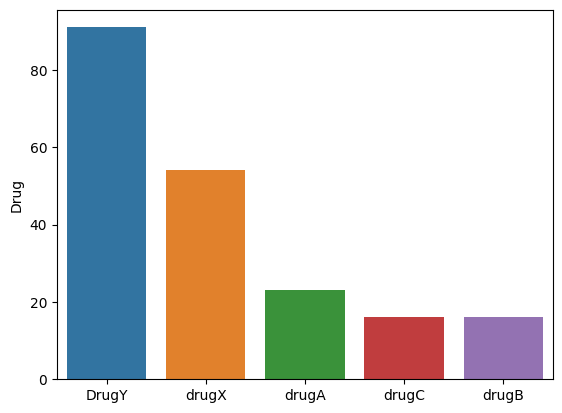

In [12]:
sns.barplot(x=df['Drug'].value_counts().index, y=df['Drug'].value_counts())

In [13]:
# there are no null values so skip the handling null value step.

In [14]:
# label encoding the categorical columns

from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

# # or using loop

# col = df.columns[1:5]

# for i in range(len(col)):
#   df[col[i]] = le.fit_transform(df[col[i]]);

In [17]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [18]:
# Splitting dependent and in-dependent data

In [19]:
x = df.iloc[:, 0:5]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [20]:
# y = pd.get_dummies(df.iloc[:, 5:]).values
# y

y = df['Drug']
y.head()

0    0
1    3
2    3
3    4
4    0
Name: Drug, dtype: int64

In [21]:
# Split the training and testing data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled,y,test_size = 0.2, random_state=21)

In [25]:
x.shape, y.shape

((200, 5), (200,))

In [26]:
xtrain.shape, xtest.shape

((160, 5), (40, 5))

In [27]:
ytrain.shape, ytest.shape

((160,), (40,))

# Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

In [28]:
# Build an ANN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
# Initialize the model
model = Sequential()

# Add the input layer
# model.add(Dense(5, activation='relu', input_dim=5))

model.add(Dense(5, activation='relu', input_shape=(5,)))

# Add 4 hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Add the output layer
model.add(Dense(5, activation='softmax'))

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 32)                192       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 7,875
Trainable params: 7,875
Non-trainabl

In [43]:
# Train the model
model.fit(xtrain, ytrain, epochs=30, batch_size=15, validation_data=(xtest, ytest))

Epoch 1/30
11/11 [==============================] - 0s 10ms/step - loss: 0.1782 - accuracy: 0.9563 - val_loss: 0.5381 - val_accuracy: 0.8250
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 0.1797 - accuracy: 0.9187 - val_loss: 0.5366 - val_accuracy: 0.8000
Epoch 3/30
11/11 [==============================] - 0s 7ms/step - loss: 0.1765 - accuracy: 0.9563 - val_loss: 0.6326 - val_accuracy: 0.7750
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 0.1491 - accuracy: 0.9563 - val_loss: 0.5418 - val_accuracy: 0.7750
Epoch 5/30
11/11 [==============================] - 0s 5ms/step - loss: 0.1323 - accuracy: 0.9625 - val_loss: 0.5402 - val_accuracy: 0.8000
Epoch 6/30
11/11 [==============================] - 0s 7ms/step - loss: 0.1154 - accuracy: 0.9688 - val_loss: 0.5358 - val_accuracy: 0.8000
Epoch 7/30
11/11 [==============================] - 0s 6ms/step - loss: 0.1090 - accuracy: 0.9688 - val_loss: 0.5387 - val_accuracy: 0.8000
Epoch 8/30
11/11 [=

# Task 3: Test the model with random data

In [44]:
random_data = np.array([[30, 0, 1, 0, 11.567], [47, 1, 1, 0, 10.685],[28, 0, 2, 0, 7.358],[23, 0,	0,	0,	25.355]])
random_data

array([[30.   ,  0.   ,  1.   ,  0.   , 11.567],
       [47.   ,  1.   ,  1.   ,  0.   , 10.685],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.358],
       [23.   ,  0.   ,  0.   ,  0.   , 25.355]])

In [45]:
pred = model.predict(random_data)

1/1 [==============================] - 0s 21ms/step


In [46]:
drug_classes = ['DrugY', 'drugA', 'drugB','drugC', 'drugX']
pred_classes = [drug_classes[np.argmax(p)] for p in pred]

In [47]:
for i in range(len(random_data)):
    print("Predicted Drug Class - {}".format(pred_classes[i]))

Predicted Drug Class - DrugY
Predicted Drug Class - drugX
Predicted Drug Class - DrugY
Predicted Drug Class - DrugY


In [49]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 4ms/step


In [50]:
drugClass = ['DrugY', 'drugA', 'drugB','drugC', 'drugX']
# drugClass = df['Drug'].unique()
predClass = [drugClass[np.argmax(p)] for p in ypred]

In [51]:
print("Predicted Drug Class\n")
for i in range(len(ypred)):
    print(predClass[i])

Predicted Drug Class

drugA
DrugY
DrugY
DrugY
drugX
DrugY
DrugY
drugA
drugX
DrugY
DrugY
DrugY
drugX
drugX
DrugY
drugX
drugB
DrugY
drugA
DrugY
drugB
DrugY
DrugY
drugX
drugA
DrugY
DrugY
drugX
drugC
DrugY
DrugY
drugB
drugC
DrugY
drugC
DrugY
drugB
DrugY
drugA
drugB


In [52]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(xtest, ytest)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

2/2 [==============================] - 0s 7ms/step - loss: 0.6180 - accuracy: 0.8750
Test Loss: 0.6180
Test Accuracy: 87.50%


In [53]:
# Submitted by MADHUSMITA MUKHERJEE (20BCE2783) - VIT VELLORE